In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation ,Dropout ,Flatten
from keras.layers import Conv2D, MaxPooling2D

# モデルを構築
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model.summary()

   

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          18496     
__________

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  from ipykernel import kernelapp as app


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    '/export/space/ide-y/jupyter/kadai4/repo4/train',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/export/space/ide-y/jupyter/kadai4/repo4/validation',
    target_size=(32, 32),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
 result_dir = '/export/spcae/ide-y/jupyter/kadai4/repo4'
nb_epoch = 10

In [8]:
def save_history(history, result_file):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open(result_file, "w") as fp:
        fp.write("epoch\tloss\tacc\tval_loss\tval_acc\n")
        for i in range(nb_epoch):
            fp.write("%d\t%f\t%f\t%f\t%f\n" % (i, loss[i], acc[i], val_loss[i], val_acc[i]))

In [10]:
   
# 訓練
history = model.fit_generator(
    train_generator,
    samples_per_epoch=2000,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=800,
    verbose=2)
     

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=2, validation_data=<keras.pre..., steps_per_epoch=62, epochs=10, validation_steps=800)`
  if __name__ == '__main__':


Epoch 1/10
84s - loss: 0.5821 - acc: 0.7016 - val_loss: 0.5966 - val_acc: 0.6550
Epoch 2/10
83s - loss: 0.5798 - acc: 0.7147 - val_loss: 0.5848 - val_acc: 0.6923
Epoch 3/10
84s - loss: 0.5610 - acc: 0.7197 - val_loss: 0.5866 - val_acc: 0.6882
Epoch 4/10
84s - loss: 0.5570 - acc: 0.7193 - val_loss: 0.5892 - val_acc: 0.6813
Epoch 5/10
83s - loss: 0.5391 - acc: 0.7344 - val_loss: 0.5701 - val_acc: 0.7082
Epoch 6/10
83s - loss: 0.5298 - acc: 0.7414 - val_loss: 0.5544 - val_acc: 0.7155
Epoch 7/10
83s - loss: 0.5394 - acc: 0.7314 - val_loss: 0.5756 - val_acc: 0.6916
Epoch 8/10
83s - loss: 0.5360 - acc: 0.7404 - val_loss: 0.5675 - val_acc: 0.6908
Epoch 9/10
83s - loss: 0.5100 - acc: 0.7495 - val_loss: 0.5596 - val_acc: 0.7101
Epoch 10/10
84s - loss: 0.5123 - acc: 0.7520 - val_loss: 0.5902 - val_acc: 0.6828


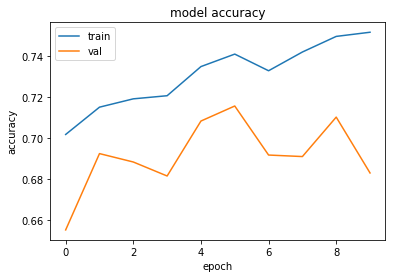

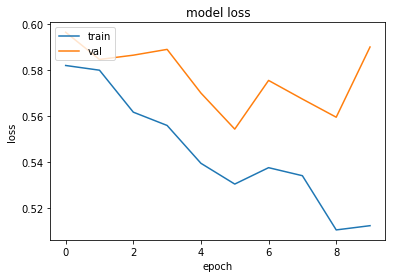

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

    
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()